<a href="https://colab.research.google.com/github/Shuvo1523004/Deep-Learning/blob/main/Notebooks/Chap04/4_1_Composing_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 4.1 -- Composing networks

The purpose of this notebook is to understand what happens when we feed one neural network into another. It works through an example similar to 4.1 and varies both networks

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions

In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [3]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [4]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y

In [5]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].

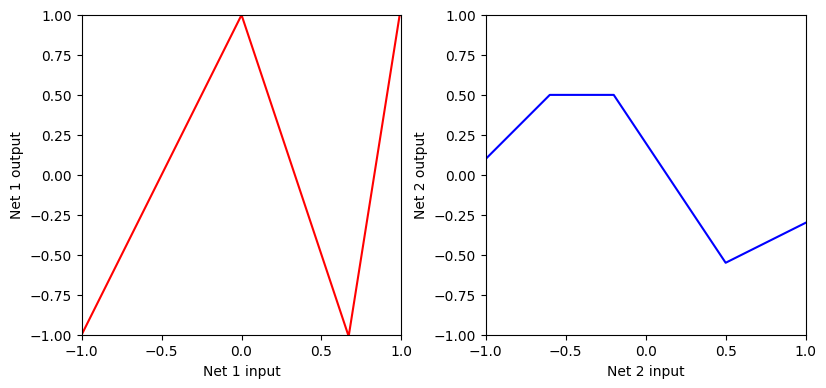

In [6]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

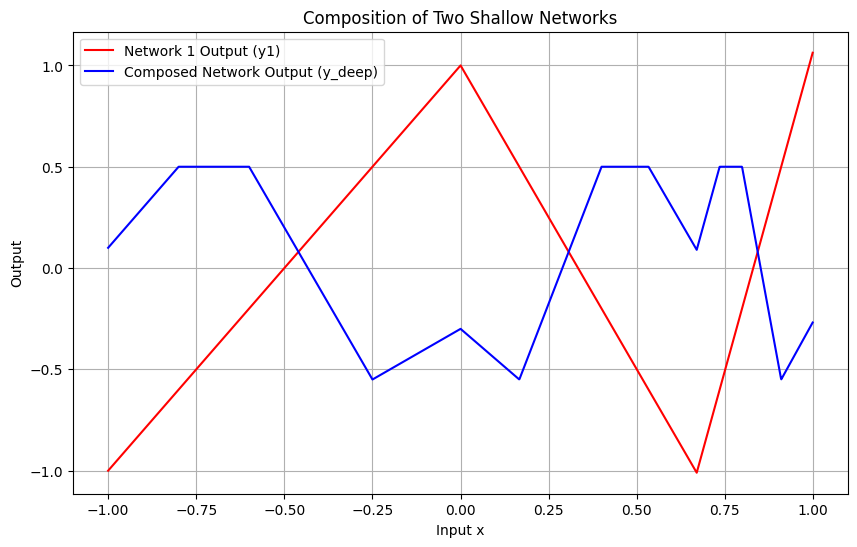

In [7]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the second one.  Draw the relationship between
# the input of the first network and the output of the second one.

# 3. Define the parameters for the two networks (from your prompt)
# Network 1 Parameters
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 = 1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Network 2 Parameters
n2_theta_10 = -0.6  ; n2_theta_11 = -1.0
n2_theta_20 = 0.2   ; n2_theta_21 = 1.0
n2_theta_30 = -0.5  ; n2_theta_31 = 1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# 4. Generate input range
x = np.arange(-1, 1, 0.001)

# 5. Run the composition: y_deep = Net2(Net1(x))
# First, get the output of Network 1
y1 = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3,
                   n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)

# Second, feed that output into Network 2
y_deep = shallow_1_1_3(y1, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
                       n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# 6. Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'r-', label='Network 1 Output (y1)')
plt.plot(x, y_deep, 'b-', label='Composed Network Output (y_deep)')
plt.title('Composition of Two Shallow Networks')
plt.xlabel('Input x')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

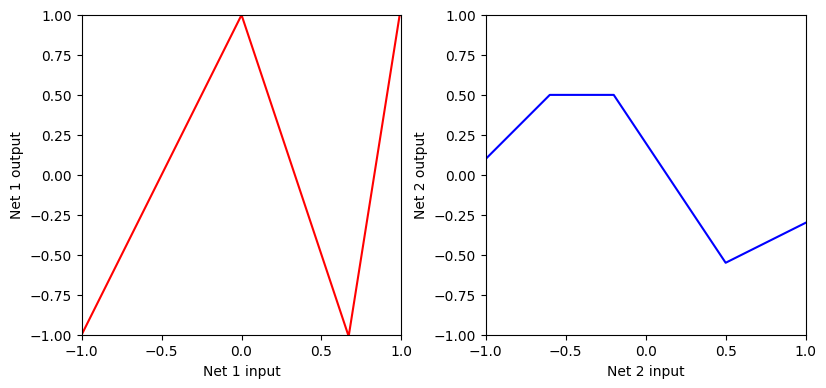

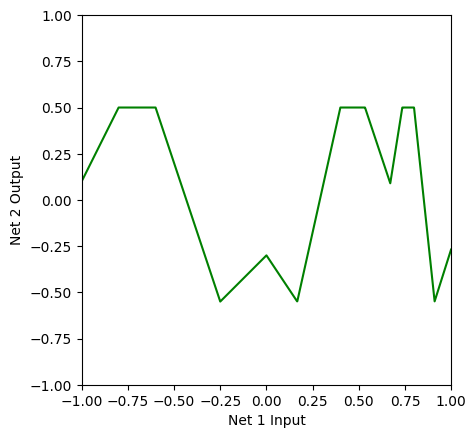

In [8]:
# Now let's see if your predictions were right

# TODO feed the output of first network into second network (replace this line)
# Feed the output of first network into second network
# The shallow_1_1_3 function returns only the final output 'y', which is already an array.
# So, we pass net1_out directly.

net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
                          n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

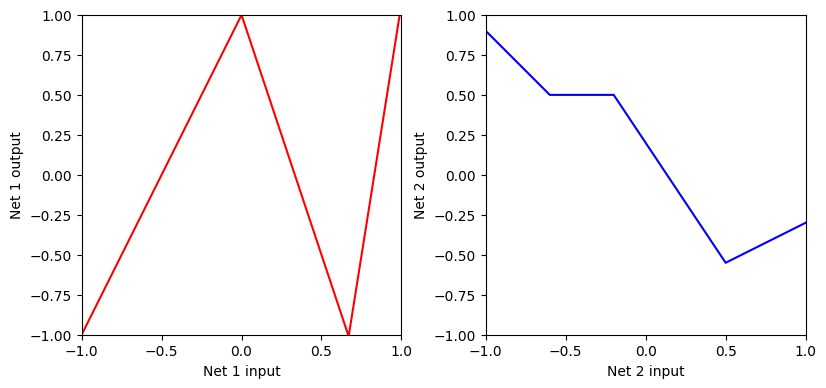

In [9]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the modified second network.  Draw the relationship between
# the input of the first network and the output of the second one.

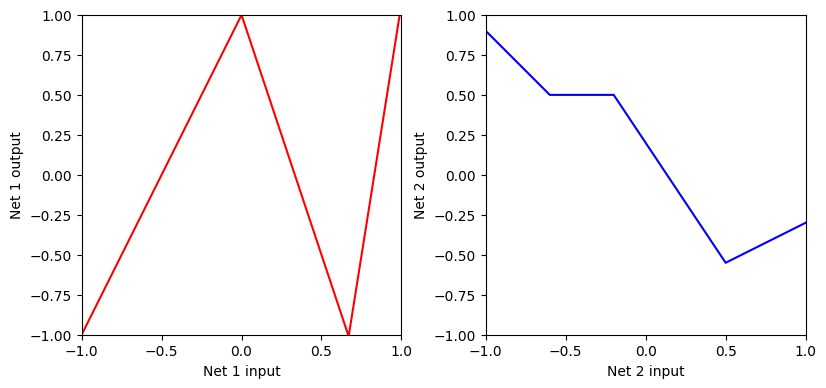

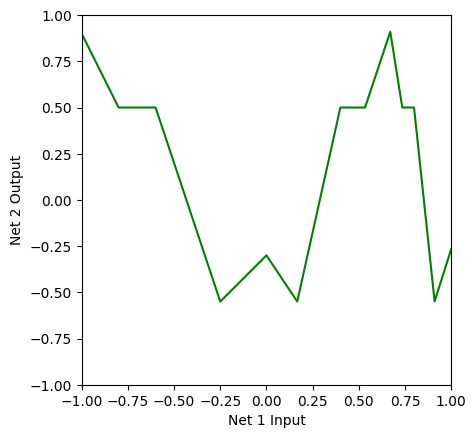

In [13]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

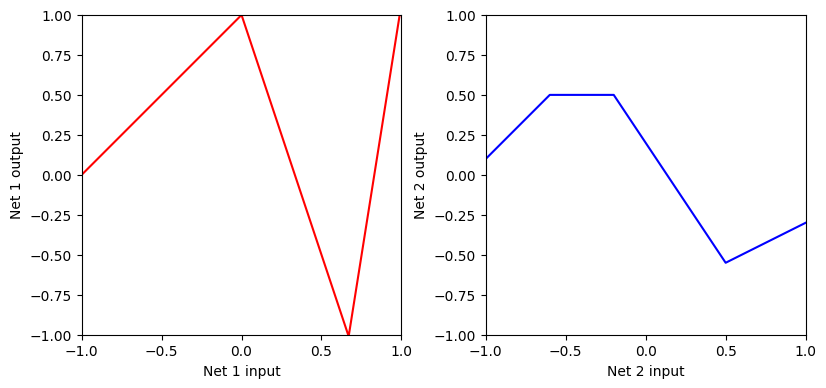

In [10]:
# Let's change things again.  What happens if we change the first network? (note the changes)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [11]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the modified first network into the original second network.  Draw the relationship between
# the input of the first network and the output of the second one.

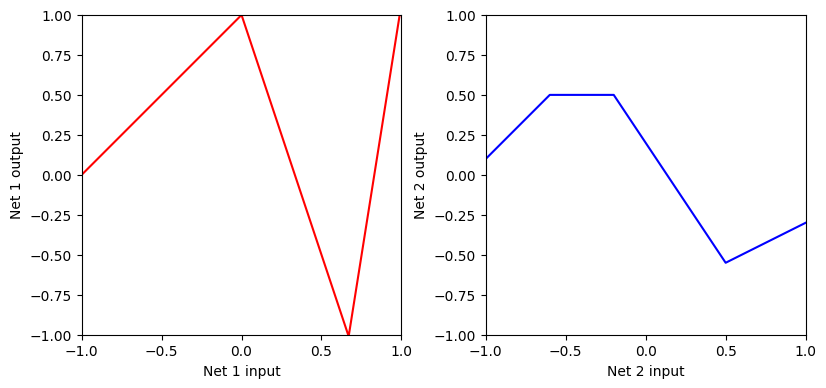

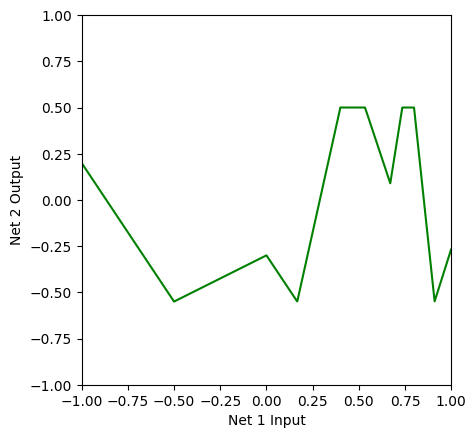

In [12]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

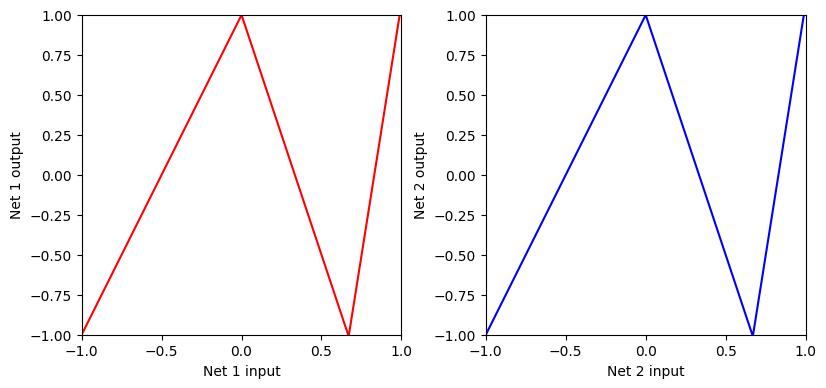

In [13]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

In [14]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the a copy of itself.  Draw the relationship between
# the input of the first network and the output of the second one.

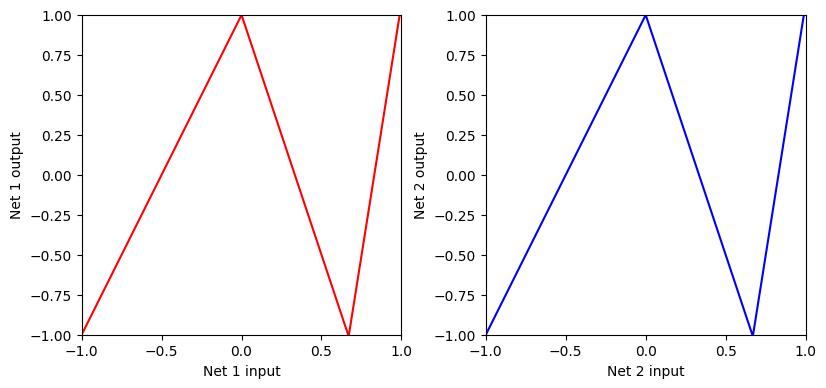

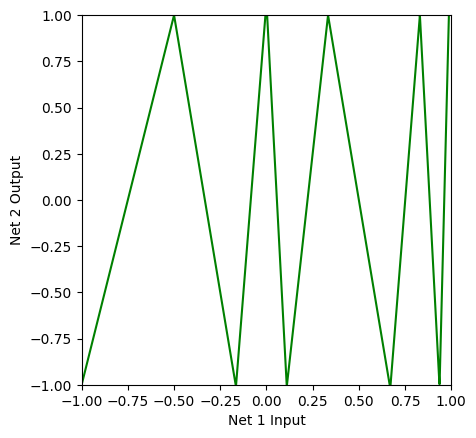

In [15]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

In [ ]:
# TODO
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

In [16]:
# TODO
# How many linear regions would there be if we ran N copies of the first network, feeding the result of the first
# into the second, the second into the third and so on, and then passed the result into the original second
# network (blue curve above)

# Take away conclusion:  with very few parameters, we can make A LOT of linear regions, but
# they depend on one another in complex ways that quickly become too difficult to understand intuitively.